In [74]:
import pandas as pd
import numpy as np                        
import matplotlib.pyplot as plt
#import the dataset
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [75]:
X = df.iloc[:, [0,1,2,3]].values    #extract only values from dataframe
X.shape                             # 150 examples 4 feutures
#Implementing principal component analysis from scratch

(150, 4)

In [76]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)       #feauture normalisation so that mean of all data is approx 0 and standard deviation 1
X                                  #X is new standardised matrix

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [77]:
mean_vec = np.mean(X, axis=0)
mean_vec                  #mean is calculated for every column

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [78]:
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
cov_mat                       #covariance matrix is calculated by ((X-Xmean)T*(X-Xmean))

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [79]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)                    #eigen values and eigen vectors for co variance matrix
print(eig_vecs)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [80]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs                           #pair up values and vectors

[(2.9303537755893156,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164008,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559599,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [81]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs                #sort in descending order based on eigen values
# and it is the same in order of obtained eigen values from the function

[(2.9303537755893156,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164008,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559599,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [82]:
eig_reduce=eig_vecs[:,:2];
eig_reduce         #consider only first 2 eigen vectors as eigen first two eigen values contribute much of their sum.
#it is 4*2 matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [83]:
z=np.dot((eig_reduce.T),(X.T))  #multiply 2*4 and 4*150 to get 2*150 matrix
z_final=z.T     #transpose it to get the modified matrix with 2 modified features 
z_final

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

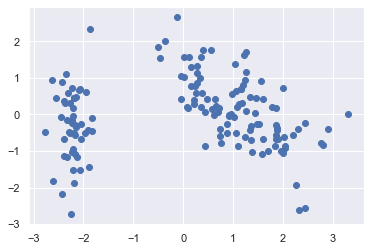

In [84]:
plt.scatter(z_final[:, 0], z_final[:, 1])   #we get modified plot considering 4 features.

In [85]:
#check PCA with direct inbuilt function
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pct = pca.fit_transform(X)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
principal_df


,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [86]:
finaldf= pd.concat([principal_df,df[['species']]],axis=1)
finaldf               #adding species column from main data frame in order to create a new one for plotting

,pc1,pc2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


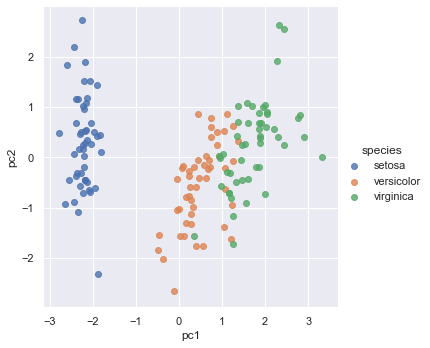

In [87]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set(color_codes=True)                   # plot between new features to with refernce to species
sns.lmplot(x="pc1",y="pc2", data=finaldf, hue="species", fit_reg=False)

In [109]:
#implementing kmeans algorithm now on the modified data
from sklearn.cluster import KMeans          
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_df)
y_kmeans = kmeans.predict(principal_df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [110]:
clusters=y_kmeans
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [111]:
principal_df['clusters']=clusters
principal_df                  #add clusters column to the dataframe

,pc1,pc2,clusters
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1
...,...,...,...
145,1.870522,0.382822,0
146,1.558492,-0.905314,2
147,1.520845,0.266795,0
148,1.376391,1.016362,0


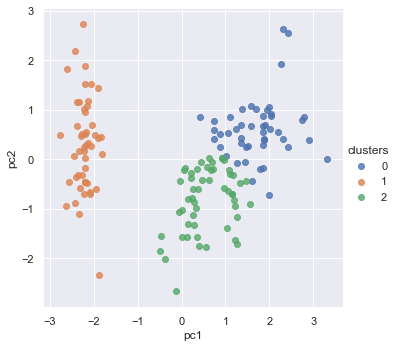

In [112]:
import seaborn as sns
sns.set(style='whitegrid')    
sns.set(color_codes=True)             #plot between the modified data columns with refernce to clusters
sns.lmplot(x="pc1",y="pc2", data=principal_df, hue="clusters", fit_reg=False)